In [1]:
addprocs(8)  # parallel computing

8-element Array{Any,1}:
 2
 3
 4
 5
 6
 7
 8
 9

INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...
INFO: Loading help data...


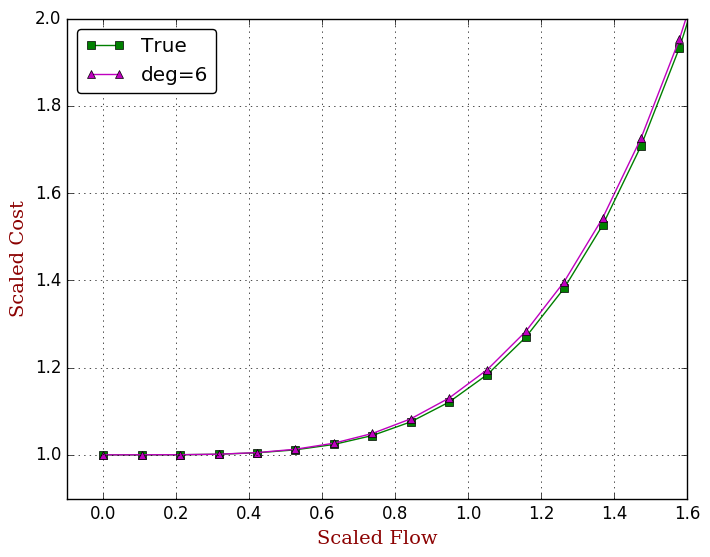

In [2]:
require("demands_adjustment_Sioux_simp")

In [3]:
# get the ground truth flow observations
x_0 = similar(flow_data)
for i = 1:numLinks
    x_0[i] = flows[int(split(link_label_dict["$(i-1)"], ',')[1]), int(split(link_label_dict["$(i-1)"], ',')[2])]
end
x_0

30-element Array{Float64,1}:
  2300.0 
  3900.0 
  2300.0 
  3500.0 
  3900.0 
  7060.55
  3039.45
  7105.27
 10650.3 
  4202.51
 10642.0 
  8050.28
  7900.0 
     ⋮   
  6500.0 
  5158.04
  7900.0 
  5149.72
 13758.0 
 13749.7 
  8158.04
  4155.55
  8249.72
  4194.73
  2994.73
  4239.45

In [4]:
# get the solution to the TAP, given the demands g^l
x

30-element Array{Float64,1}:
  2299.6 
  3901.32
  2301.32
  3500.81
  3899.6 
  7106.19
  2995.98
  7058.53
 10643.0 
  4153.94
 10648.6 
  8041.78
  7904.04
     ⋮   
  6500.0 
  5149.03
  7901.79
  5158.62
 13750.1 
 13757.4 
  8250.08
  4200.66
  8157.43
  4238.93
  3041.91
  4193.0 

In [5]:
require("solveJacob")

In [6]:
numRoutes

1232

In [7]:
# jacob = zeros(length(demandsVec), numLinks)
# jacob = dzeros((length(demandsVec),numLinks), workers()[1:8], [8,1])

@time y = @parallel vcat for i=1:numODpairs
    solveJacob(i)
#     d = solveJacob(i)
#     println(d)
#     for j=1:numLinks
#         jacob[i,j] = d[j]
#     end
#     println("$(i)-th row completed")
end

y = reshape(y, numODpairs, numLinks)
println(y)

outfile = open("jacobian.json", "w")

JSON.print(outfile, y)

close(outfile)

# M = {1:length(demandsVec)}
# pmap(solveJacob, M)

elapsed time: 16.933558643 seconds (12179996 bytes allocated)
[-0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 1.0 -0.0 0.0 0.0 0.0 1.0 -0.0 0.0 0.0 0.0 1.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0
 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0
 -1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [8]:
# load Jacobian
jacobian = readall("jacobian.json");
jacobian = JSON.parse(jacobian);

jacob = zeros(numODpairs, numLinks)
for i = 1:numLinks
    for j = 1:numODpairs
        jacob[j, i] = jacobian[i][j]
    end
end

In [9]:
jacob

132x30 Array{Float64,2}:
 -0.0   0.0   0.0  0.0   0.0  -0.0  0.0  …   1.0  -0.0  0.0   0.0  0.0   1.0
  0.0   0.0   0.0  0.0   0.0   0.0  0.0      0.0   0.0  0.0   0.0  0.0   0.0
  0.0  -1.0   0.0  0.0   0.0   0.0  0.0      1.0   0.0  0.0   1.0  0.0   0.0
 -1.0   0.0   0.0  0.0   0.0   0.0  0.0      0.0   0.0  0.0   0.0  0.0   0.0
  0.0   0.0   0.0  0.0   0.0   1.0  0.0      0.0   1.0  0.0   0.0  0.0   0.0
  0.0   0.0   0.0  0.0   0.0   0.0  0.0  …   1.0   0.0  0.0   0.0  0.0   0.0
  0.0   0.0  -0.0  0.0   0.0   0.0  0.0      0.0   0.0  0.0  -0.0  0.0   0.0
 -1.0   0.0   1.0  0.0   0.0   0.0  0.0      0.0   1.0  0.0   0.0  0.0   0.0
  0.0   0.0   0.0  0.0   0.0   0.0  0.0      0.0   0.0  0.0   0.0  0.0   0.0
  0.0   0.0   0.0  0.0   0.0   0.0  0.0      0.0   0.0  0.0   0.0  0.0   0.0
 -1.0   0.0   0.0  0.0   0.0   0.0  0.0  …   0.0   0.0  0.0   0.0  0.0   1.0
  0.0   0.0   1.0  0.0   0.0   0.0  0.0      0.0   0.0  0.0   0.0  0.0   0.0
  0.0   0.0   0.0  0.0  -0.0   0.0  0.0     -0.0   

In [10]:
# compute the gradient
gradi_ = zeros(numODpairs)
for i = 1:numODpairs
    gradi_[i] = sum([2 * (x[j] - x_0[j]) * jacob[i, j] for j = 1:numLinks])
end

In [11]:
numNodes

12

In [16]:
OD_pair_label_dict = Dict()
OD_pair_label_dict_ = Dict()
label = 1
for i = 1:numNodes
    for j = 1:numNodes
        if i != j
            key = "($(i), $(j))"
            OD_pair_label_dict[key] = label
            OD_pair_label_dict_[label] = key
            label += 1
        end
    end
end

In [18]:
OD_pair_label_dict_[numODpairs]

"(12, 11)"

In [19]:
# ensure the consistency of dimensions

gradi = zeros(numODpairs)

for i = 1:numODpairs
    if ~("($(odPairLabel_["$(i)"][1]), $(odPairLabel_["$(i)"][2]))" in keys(OD_pair_label_dict))
        gradi[i] = 0
    else
        gradi[i] = gradi_[OD_pair_label_dict["($(odPairLabel_["$(i)"][1]), $(odPairLabel_["$(i)"][2]))"]]
    end
end

In [20]:
# for convenience of computing the new demand vector
demandsVec

144-element Array{Float64,1}:
   -0.0   
  100.918 
   99.8592
  509.714 
  201.735 
  306.797 
  499.425 
  787.206 
  505.934 
 1273.04  
  503.977 
  200.152 
   99.9535
    ⋮     
  198.938 
  100.741 
  200.027 
  594.396 
  200.989 
  198.65  
  671.896 
  578.398 
  595.352 
 2051.51  
 1397.68  
   -0.0   

In [21]:
# convert the demand data into dictionary; for convenience of solving the TAP problem and the inverse VI problem

demandsDict = similar(demands)

for key = keys(demands)
    demandsDict[key] = demandsVec[odPairLabel["($(key[1]), $(key[2]))"]]
end

In [22]:
demandsDict[(11,11)]

-0.0

In [23]:
demandsDict

Dict{(Int64,Int64),Float64} with 144 entries:
  (1,5)   => 201.73475109001316
  (3,5)   => 100.87487252055737
  (3,6)   => 299.5021045489281
  (10,5)  => 1012.5308263829866
  (6,9)   => 401.51808303573233
  (12,4)  => 594.3961808572673
  (4,4)   => -0.0
  (9,4)   => 703.6510057585217
  (10,11) => 3983.083633974105
  (8,9)   => 802.8380537141608
  (9,1)   => 508.58504898919557
  (11,1)  => 485.55197133573523
  (8,11)  => 798.0893876298113
  (3,1)   => 99.82168458278481
  (1,10)  => 1273.037395205722
  (1,12)  => 200.15212983407622
  (12,7)  => 671.8964894805454
  (4,5)   => 495.2520672125567
  (9,9)   => -0.0
  (11,8)  => 761.7997688940601
  (12,8)  => 578.3978868340797
  (2,4)   => 202.20642850113612
  (6,5)   => 199.39639744456795
  (4,9)   => 699.2066270918332
  (8,4)   => 698.8784495590038
  ⋮        => ⋮

In [24]:
gradi

132-element Array{Float64,1}:
    0.0     
   73.1675  
    5.88257 
  256.077   
    0.808489
  218.85    
  184.098   
    0.0     
  110.516   
   22.8685  
    0.0     
  -75.2595  
  -90.8308  
    ⋮       
    8.66013 
    0.0     
   91.7165  
  -62.2758  
    0.0     
   90.2198  
 -102.856   
    1.6225  
    0.0     
   60.4402  
    0.0     
 -101.296   

In [25]:
# compute a descent direction

r = similar(gradi)
for i = 1:length(gradi)
    r[i] = -1 * gradi[i]
end

In [26]:
r

132-element Array{Float64,1}:
   -0.0     
  -73.1675  
   -5.88257 
 -256.077   
   -0.808489
 -218.85    
 -184.098   
   -0.0     
 -110.516   
  -22.8685  
   -0.0     
   75.2595  
   90.8308  
    ⋮       
   -8.66013 
   -0.0     
  -91.7165  
   62.2758  
   -0.0     
  -90.2198  
  102.856   
   -1.6225  
   -0.0     
  -60.4402  
   -0.0     
  101.296   

In [27]:
# compute a search direction

r_ = similar(r)
for i = 1:length(r)
    if (demandsVec[i] > 50) || (demandsVec[i] <= 50 && r[i] > 0)
        r_[i] = r[i]
    else
        r_[i] = 0
    end
end

In [28]:
r_

132-element Array{Float64,1}:
    0.0     
  -73.1675  
   -5.88257 
 -256.077   
   -0.808489
 -218.85    
 -184.098   
   -0.0     
 -110.516   
  -22.8685  
   -0.0     
   75.2595  
   90.8308  
    ⋮       
   -8.66013 
   -0.0     
  -91.7165  
   62.2758  
   -0.0     
  -90.2198  
  102.856   
   -1.6225  
   -0.0     
  -60.4402  
    0.0     
  101.296   

In [29]:
# line search

alphaList = Float64[]

for i = 1:length(r_)
    if r_[i] < 0
        push!(alphaList, -demandsVec[i]/r_[i])
    end
end

alpha_max = minimum(alphaList)

0.7816724058377738

In [32]:
length(r_)

132

In [30]:
# update

demandsVec_new = similar(demandsVec)
for i = 1:length(demandsVec)
    demandsVec_new[i] = demandsVec[i] + (alpha_max) * r_[i] 
end

LoadError: BoundsError()
while loading In[30], in expression starting on line 4

In [81]:
demandsVec_new

576-element Array{Float64,1}:
    0.0   
   95.3718
   57.1654
  435.208 
  109.866 
  304.054 
  488.55  
  830.654 
  447.974 
 1368.15  
  445.18  
  198.744 
  485.914 
    ⋮     
  670.139 
  409.635 
  395.408 
  274.0   
  284.738 
   41.1655
   80.6828
  427.193 
  529.475 
 1134.03  
  699.718 
    0.0   

In [82]:
demandsVec

576-element Array{Float64,1}:
   -0.0   
  104.994 
   95.0693
  475.094 
  190.048 
  314.994 
  524.989 
  839.989 
  524.776 
 1364.85  
  475.212 
  209.957 
  524.948 
    ⋮     
  707.669 
  418.336 
  380.416 
  285.368 
  285.157 
   -0.0   
   95.0475
  404.716 
  518.853 
 1115.59  
  716.523 
   -0.0   

In [78]:
demands_0

Dict{(Int64,Int64),Float64} with 576 entries:
  (23,8)  => 287.0230453628497
  (8,23)  => 299.3674215044215
  (6,9)   => 381.35806382541404
  (18,3)  => -0.0
  (21,13) => 608.9281335229113
  (22,16) => 1158.664329742141
  (15,17) => 1574.6997727448802
  (22,14) => 1180.665932823669
  (13,9)  => 629.9522195141762
  (23,10) => 1834.8043659946168
  (24,22) => 1115.5853835582311
  (8,9)   => 839.5964769976358
  (9,1)   => 524.7907675569721
  (17,14) => 734.4793412059158
  (16,6)  => 884.8157854343763
  (16,12) => 666.9297134891472
  (16,13) => 627.2382937400898
  (22,2)  => 95.05798722618086
  (24,3)  => -0.0
  (7,16)  => 1463.4101923202682
  (1,12)  => 209.9566826318147
  (4,5)   => 524.442528468669
  (11,8)  => 838.5839664477187
  (18,21) => 95.31007440495976
  (19,4)  => 209.92418397824437
  ⋮        => ⋮